Imports

In [6]:
import cv2
import numpy as np
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

Read and Display Images

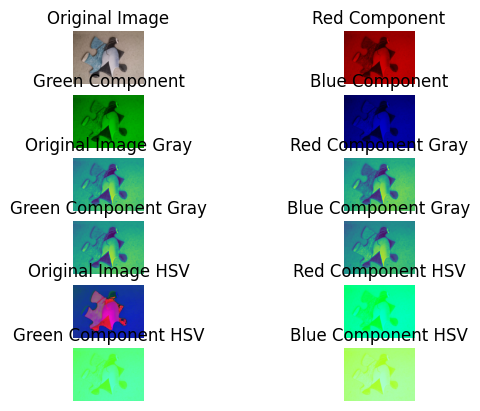

In [27]:
def displayImage(image):
    img = cv2.imread('Images/'+image)
    img = img[:,:,::-1]
    red, green, blue = cv2.split(img)
    empty = red * 0

    red_image = cv2.merge([red, empty, empty])
    green_image = cv2.merge([empty, green, empty])
    blue_image = cv2.merge([empty, empty, blue])

    plt.subplot(6, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(6, 2, 2)
    plt.imshow(red_image)
    plt.title('Red Component')
    plt.axis('off')

    plt.subplot(6, 2, 3)
    plt.imshow(green_image)
    plt.title('Green Component')
    plt.axis('off')

    plt.subplot(6, 2, 4)
    plt.imshow(blue_image)
    plt.title('Blue Component')
    plt.axis('off')

    plt.subplot(6, 2, 5)
    plt.imshow(skimage.color.rgb2gray(img))
    plt.title('Original Image Gray')
    plt.axis('off')

    plt.subplot(6, 2, 6)
    plt.imshow(skimage.color.rgb2gray(red_image))
    plt.title('Red Component Gray')
    plt.axis('off')

    plt.subplot(6, 2, 7)
    plt.imshow(skimage.color.rgb2gray(green_image))
    plt.title('Green Component Gray')
    plt.axis('off')

    plt.subplot(6, 2, 8)
    plt.imshow(skimage.color.rgb2gray(blue_image))
    plt.title('Blue Component Gray')
    plt.axis('off')

    plt.subplot(6, 2, 9)
    plt.imshow(skimage.color.rgb2hsv(img))
    plt.title('Original Image HSV')
    plt.axis('off')

    plt.subplot(6, 2, 10)
    plt.imshow(skimage.color.rgb2hsv(red_image))
    plt.title('Red Component HSV')
    plt.axis('off')

    plt.subplot(6, 2, 11)
    plt.imshow(skimage.color.rgb2hsv(green_image))
    plt.title('Green Component HSV')
    plt.axis('off')

    plt.subplot(6, 2, 12)
    plt.imshow(skimage.color.rgb2hsv(blue_image))
    plt.title('Blue Component HSV')
    plt.axis('off')

    plt.show()

displayImage("image-35.jpg")